### Rasyid Adi Sulistiawan
### 22306144037
### Fisika B 2022


Capaian Pembelajaran

Menguasai metode interpolasi Lagrange dan Newton, mengevaluasi efektivitasnya dan pertimbangan komputasi dalam berbagai skenario.

## Polinomial Lagrange

Polinomial Lagrange adalah pilihan yang sangat populer untuk membangun interpolan untuk kumpulan data tertentu. Dengan N + 1 data yang diberikan di atas, polinomial Lagrange didefinisikan sebagai kombinasi linier:

$$
L(x) = \sum_{i=0}^{N} y_i \ell_i(x)
$$

di mana $l_i(x)$ adalah pilihan basis baru kita (berbeda dengan monomial, tetapi idenya sama karena membentuk basis), dan $y_i$ adalah N + 1 bobot/koefisien basis tersebut.

Inti dari pendekatan ini adalah kita tidak lagi harus menghitung bobot dengan membalikkan sistem matriks seperti yang kita lakukan di atas dengan monomial. Sekarang, dengan membangun pendekatan ini, kita mengetahui bobot langsung dari data yang diberikan. Fungsi $l_i(x)$ dikenal sebagai basis polinomial Lagrange dan didefinisikan sebagai hasil perkalian:

$$
\ell_i(x) = \prod_{\substack{0 \le j \le N \\ j \neq i}} \frac{x - x_j}{x_i - x_j}
$$

di mana $0 \leq i \leq N$.

Jika N = 0, yaitu jika hanya ada satu titik di dataset, maka hanya terdapat satu basis polinomial Lagrange yang didefinisikan sebagai $l_i = 0$. Perhatikan bahwa tidak boleh ada dua $x_i$ yang sama, $ x_i - x_M \neq 0$, sehingga persamaannya tidak pernah dibagi dengan 0.

Alasan kenapa $x_i = x_j$ dengan $y_i \neq y_j$ tidak diperbolehkan, adalah karena tidak terdapat fungsi interpolasi L sedemikian sehingga $y_i = L(x_i)$; sebuah fungsi hanya akan mengembalikan satu nilai unik untuk $x_i$ tertentu. Di sisi lain, juga jika $y_i = y_j$, maka kedua titik tersebut pasti sama, sehingga salah satu bisa dihilangkan, dan polinomial derajat N - 1 digunakan untuk menginterpolasi N titik data yang berbeda satu sama lain.


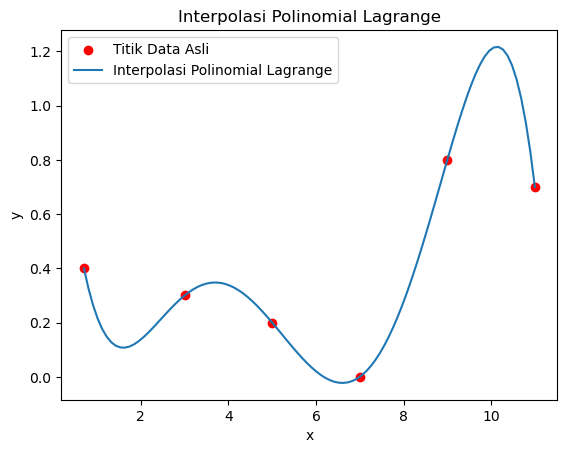

In [3]:
# Contoh

import numpy as np
import matplotlib.pyplot as plt

def lagrange_basis(x, xi, xj):
    """
    Menghitung basis polinomial Lagrange l_i(x).
    """
    basis = 1
    for xk in xj:
        if xi != xk:
            basis *= (x - xk) / (xi - xk)
    return basis

def lagrange_interpolation(x, y, xi):
    """
    Menghitung nilai interpolasi polinomial Lagrange pada titik xi.
    """
    n = len(x)
    yi = 0
    for i in range(n):
        yi += y[i] * lagrange_basis(xi, x[i], x)
    return yi

# Titik data
x = np.array([0.7, 3.0, 5.0, 7.0, 9.0, 11.0])
y = np.array([0.4, 0.3, 0.2, 0.0, 0.8, 0.7])

# Nilai x baru untuk evaluasi
x_new = np.linspace(min(x), max(x), 100)
y_new = np.array([lagrange_interpolation(x, y, xi) for xi in x_new])

# Plot data asli dan hasil interpolasi
plt.scatter(x, y, color='red', label='Titik Data Asli')
plt.plot(x_new, y_new, label='Interpolasi Polinomial Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Polinomial Lagrange')
plt.legend()
plt.show()


Dalam contoh ini, kita pertama-tama mendefinisikan fungsi 'lagrange_basis' untuk menghitung basis polinomial lagrange $l_i(x)$. Kemudian kita mendefinisikan fungsi 'lagrange_interpolation' untuk menghitung nilai interpolasi pada titik $x_i$. Dengan menggunakan titik data $x$ dan $y$, kita menghasilkan nilai $y$ baru untuk berbagai nilai $x$ dalam rentang titik data asli, dan kemudian menampilkan plot dari titik data asli dan kurva hasil interpolasi polinomial lagrange.

# Polinomial Newton

## Pendekatan Polinomial dengan Derajat N

Untuk menggunakan pendekatan ini, kita menulis polinomial derajat \( N \) dalam bentuk ini:

$$
P(x) = a_0 + (x - x_0)a_1 + (x - x_0)(x - x_1)a_2 + \cdots + (x - x_0)(x - x_1) \cdots (x - x_{N-1})a_N
$$

di mana $a_0, a_1, \ldots, a_N$ adalah $N + 1$ parameter bebas yang harus kita cari menggunakan $N + 1$ informasi yang kita punya dari data. Contoh kasus dengan $N = 3$:

$$
P(x) = a_0 + (x - x_0)a_1 + (x - x_0)(x - x_1)a_2 + (x - x_0)(x - x_1)(x - x_2)a_3
$$

atau dalam bentuk yang lebih terstruktur:

$$
P(x) = a_0 + (x - x_0)\left[a_1 + (x - x_1)\left\{a_2 + (x - x_2)a_3\right\}\right]
$$


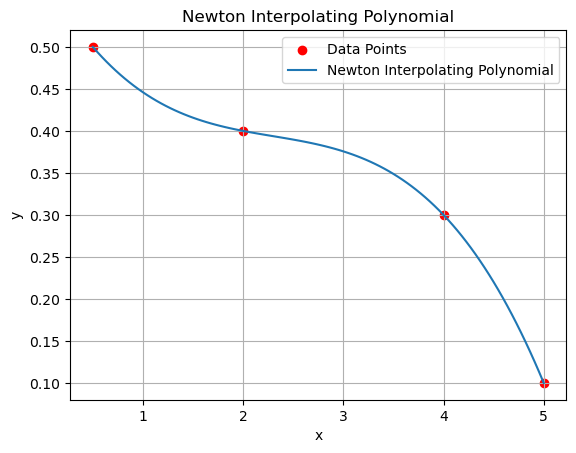

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def divided_differences(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x[i + j] - x[i])
    
    return coef[0, :]

def newton_polynomial(coef, x_data, x):
    n = len(x_data)
    p = coef[0]
    for k in range(1, n):
        term = coef[k]
        for i in range(k):
            term *= (x - x_data[i])
        p += term
    return p

# Data points
x_data = np.array([0.5, 2.0, 4.0, 5.0])
y_data = np.array([0.5, 0.4, 0.3, 0.1])

# Coefficients of Newton polynomial
coef = divided_differences(x_data, y_data)

# Generate new x values for plotting the polynomial
x_new = np.linspace(min(x_data), max(x_data), 100)
y_new = [newton_polynomial(coef, x_data, xi) for xi in x_new]

# Plotting
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_new, y_new, label='Newton Interpolating Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Newton Interpolating Polynomial')
plt.grid(True)
plt.show()

Interpolasi Newton digunakan dalam program ini untuk menginterpolasi titik data dan memplot hasilnya. Untuk memulai, library numpy untuk komputasi numerik dan matplotlib untuk plotting diimpor. 'Divided_differences' dan 'newton_polynomial' adalah dua fungsi utama yang digunakan oleh program ini.

Koefisien polinomial Newton dihitung dengan fungsi perbedaan dibagi. Dengan menggunakan fitur ini, nilai-nilai selisih terbagi disimpan dalam matriks coef, dan nilai-nilai y dari titik data dimasukkan ke dalam kolom pertama. Nilai-nilai selisih terbagi untuk setiap pasangan titik data dihitung melalui dua loop nested.

Polinomial Newton pada nilai x tertentu dievaluasi dengan fungsi 'newton_polynomial', yang menggunakan koefisien yang dihitung dari divided_differences dan titik data pada sumbu x. Polinomial dievaluasi dengan mengalikan setiap term dengan (x - x_data[ i ]), dan kemudian menambahkan hasilnya ke nilai awal polinomial.

Program menggunakan fungsi divided_differences untuk menghitung koefisien polinomial setelah mendefinisikan titik data x_data dan y_data. Selanjutnya, program menghasilkan array x_new yang berisi nilai-nilai evaluasi polinomial x_new dan array y_new yang berisi hasil evaluasi polinomial pada nilai-nilai x_new.

Akhirnya, program menampilkan plot dari titik data asli sebagai titik-titik merah menggunakan plt.scatter, serta kurva hasil interpolasi Newton menggunakan plt.plot. Untuk membuat plot lebih informatif, label untuk sumbu x dan y, legenda, judul, dan grid ditambahkan. Hasil plot menunjukkan bahwa polinomial interpolasi Newton melewati semua titik data yang diberikan.